In [167]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# 識別子の作成
from sklearn.base import BaseEstimator, TransformerMixin

In [168]:
# Classをインスタンス化
mean_model = SimpleConverter()

# Classを学習して変換
mean_model.fit(df_X)
X_mean = mean_model.transform(df_X)
print(X_mean)

         MedInc   HouseAge  AveRooms  AveBedrms   Population  AveOccup  \
0      4.454529  12.360514  1.555127  -0.072866 -1103.476744 -0.515100   
1      4.430729  -7.639486  0.809137  -0.124795   975.523256 -0.960813   
2      3.386729  23.360514  2.859136  -0.023229  -929.476744 -0.268395   
3      1.772429  23.360514  0.388352  -0.023616  -867.476744 -0.522710   
4     -0.024471  23.360514  0.852854  -0.015594  -860.476744 -0.889188   
...         ...        ...       ...        ...          ...       ...   
20635 -2.310371  -3.639486 -0.383545   0.036658  -580.476744 -0.510049   
20636 -1.313871 -10.639486  0.685035   0.219114 -1069.476744  0.052152   
20637 -2.170671 -11.639486 -0.223457   0.023417  -418.476744 -0.745020   
20638 -2.003471 -10.639486 -0.099487   0.075245  -684.476744 -0.947446   
20639 -1.482071 -12.639486 -0.174283   0.065589   -38.476744 -0.453674   

       Latitude  Longitude  
0      2.248139  -2.660296  
1      2.228139  -2.650296  
2      2.218139  -2.6702

In [169]:
X_mean = mean_model.fit_transform(df_X)
X_mean

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.454529,12.360514,1.555127,-0.072866,-1103.476744,-0.515100,2.248139,-2.660296
1,4.430729,-7.639486,0.809137,-0.124795,975.523256,-0.960813,2.228139,-2.650296
2,3.386729,23.360514,2.859136,-0.023229,-929.476744,-0.268395,2.218139,-2.670296
3,1.772429,23.360514,0.388352,-0.023616,-867.476744,-0.522710,2.218139,-2.680296
4,-0.024471,23.360514,0.852854,-0.015594,-860.476744,-0.889188,2.218139,-2.680296
...,...,...,...,...,...,...,...,...
20635,-2.310371,-3.639486,-0.383545,0.036658,-580.476744,-0.510049,3.848139,-1.520296
20636,-1.313871,-10.639486,0.685035,0.219114,-1069.476744,0.052152,3.858139,-1.640296
20637,-2.170671,-11.639486,-0.223457,0.023417,-418.476744,-0.745020,3.798139,-1.650296
20638,-2.003471,-10.639486,-0.099487,0.075245,-684.476744,-0.947446,3.798139,-1.750296


# Adstockの変換class

## 定式: y_t_ = x_t + alpha * y_t-1

In [170]:
x = pd.DataFrame([1,0,0,0,0])
y = pd.DataFrame(np.zeros_like(x))

In [171]:
x = [1.,0.,0.,0.,0]


In [172]:
def adstock(x:float, alpha:float):
    x_decay = np.zeros_like(x)
    x_decay[0] = x[0]
    for i in range(1,len(x)):
        x_decay[i] = x[i] + x_decay[i-1]*alpha
          
    print(x_decay)
    return x_decay
    

In [173]:
x = [1.0,1.,0,0,0]
y = adstock(x,0.5)

[1.     1.5    0.75   0.375  0.1875]


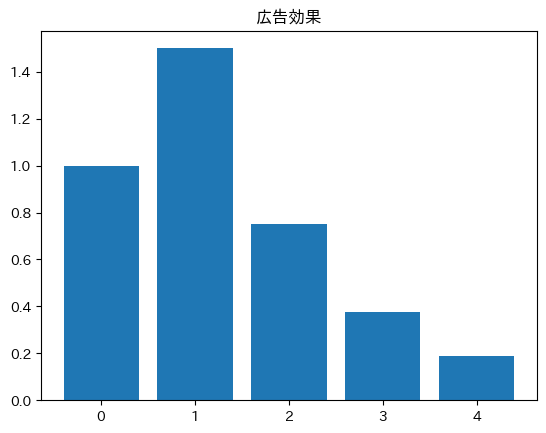

In [174]:
import japanize_matplotlib
plt.bar(range(len(x)),y)
plt.title("広告残存効果")
plt.show()

In [177]:
class AdstockGeometric(BaseEstimator,TransformerMixin):
    
    def __init__(self, alpha=0.5):
        super().__init__()
        self.alpha = alpha
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        x_decay = np.zeros_like(x)
        x_decay[0] = x[0]
        for i in range(1,len(x)):
            x_decay[i] = x[i] + x_decay[i-1]*self.alpha

        return x_decay
    

In [187]:
ads = AdstockGeometric(0.4)
x = [1.0,0,0,0,0]
ads.fit(x)

AdstockGeometric(alpha=0.4)

In [188]:
ads.transform(x)

array([1.    , 0.4   , 0.16  , 0.064 , 0.0256])

<BarContainer object of 5 artists>

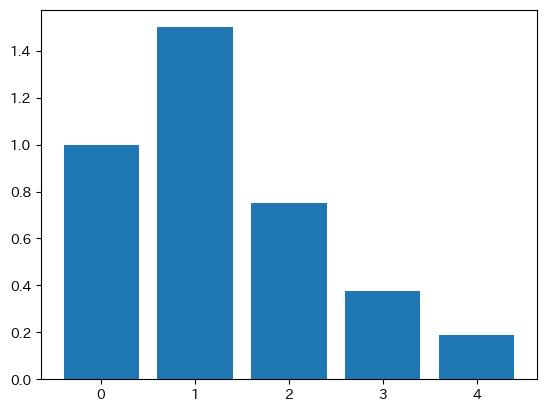

In [189]:
plt.bar(range(len(x)),y)

In [193]:
AdstockGeometric(0.4).fit_transform(x)

array([1.    , 0.4   , 0.16  , 0.064 , 0.0256])

In [194]:
mmm_data = pd.read_csv("data_raw_Robyn.csv")

In [197]:
mmm_data.head()

,DATE,revenue,tv_S,ooh_S,print_S,facebook_I,search_clicks_P,search_S,competitor_sales_B,facebook_S,events,newsletter
0,2015-11-23,2.754372e+06,167687.6,0,95463.666667,7.290385e+07,0.000000,0,8125009,228213.987444,na,19401.653846
1,2015-11-30,2.584277e+06,214600.9,0,0.000000,1.658110e+07,29511.715457,31000,7901549,34258.573511,na,14791.000000
2,2015-12-07,2.547387e+06,0.0,248022,3404.000000,4.995477e+07,36132.358958,28400,8300197,127691.261335,na,14544.000000
3,2015-12-14,2.875220e+06,625877.3,0,132600.000000,3.164930e+07,36804.210958,31900,8122883,84014.720306,na,2800.000000
4,2015-12-21,2.215953e+06,0.0,520005,0.000000,8.802269e+06,28401.744069,27100,7105985,20687.478156,na,15478.000000


In [200]:
spend_cols = ["tv_S","ooh_S","print_S"]

for col in spend_cols:
    print("============")
    print(col)
    print(len(AdstockGeometric(alpha=0.5).fit_transform(mmm_data[col])))
    print(AdstockGeometric(alpha=0.5).fit_transform(mmm_data[col]))


tv_S
208
[1.67687600e+05 2.98444700e+05 1.49222350e+05 7.00488475e+05
 3.50244238e+05 4.24311919e+05 2.17308859e+05 1.30796130e+05
 6.53980648e+04 3.26990324e+04 1.40188216e+05 7.00941081e+04
 5.32120354e+05 2.66060177e+05 4.44702289e+05 2.22351144e+05
 2.59468872e+05 1.29734436e+05 6.48672180e+04 3.24336090e+04
 1.62168045e+04 9.15589023e+04 4.57794511e+04 2.28897256e+04
 1.14448628e+04 5.72243139e+03 2.86121570e+03 1.43060785e+03
 7.15303924e+02 3.57651962e+02 1.53721726e+05 7.68608630e+04
 1.14338031e+05 5.71690157e+04 4.28376079e+04 2.14188039e+04
 2.22061302e+05 1.11030651e+05 2.70245425e+05 1.35122713e+05
 2.47495056e+05 2.83211328e+05 1.41605664e+05 7.08028320e+04
 3.54014160e+04 1.10172551e+06 5.50862754e+05 8.85851477e+05
 4.42925739e+05 9.26423769e+05 4.63211885e+05 6.24038842e+05
 3.64197321e+05 1.82098661e+05 1.97957330e+05 9.89786651e+04
 4.94893326e+04 8.32652266e+05 7.24233733e+05 3.62116867e+05
 2.25408133e+05 1.12704067e+05 3.58189233e+05 1.79094617e+05
 8.95473083e+04